In [1]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import OPTICS
import pickle
import matplotlib.pyplot as plt 
import pandas as pd 
from kneed import KneeLocator
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
with open('objects/X_stan.obj', 'rb') as f: 
    X = pickle.load(f)

with open('objects/y.obj', 'rb') as f: 
    y = pickle.load(f)

In [22]:
pca = PCA(n_components=2)
X_transformed = pd.DataFrame(pca.fit_transform(X))

<AxesSubplot:xlabel='0', ylabel='1'>

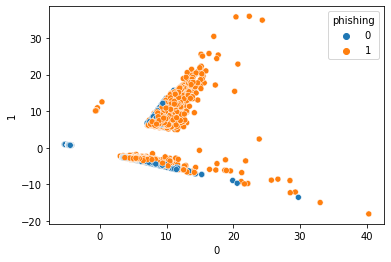

In [35]:
sns.scatterplot(x=X_transformed[0], y=X_transformed[1], hue=y)

## Applying Both Kneedle Algorithm and Elbow method to find the optimal cluster value for k-means clustering.

In [57]:
# kneedle algorithm

def find_k(df, increment=0, decrement=0):
    """Find the optimum k clusters"""
    wcss = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        wcss[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(wcss.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

In [58]:
find_k(X)

3

In [62]:
# Elbow Method

def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    wcss = {}
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        wcss[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('wcss')
    sns.pointplot(x=list(wcss.keys()),
                 y=list(wcss.values()))
    plt.show()

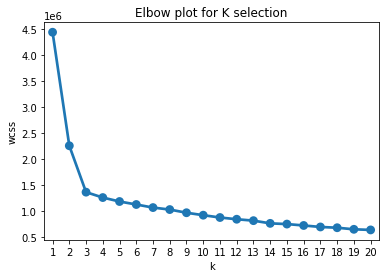

In [63]:
elbow_plot(X)

In [64]:
# Selecting three clusters based on the result. Now, it is time for creating a cluster
# and evaluating it.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

In [9]:
labels = kmeans.labels_

In [12]:
# for the future use.
with open('labels.obj', 'wb') as f: 
    pickle.dump(labels, f)

## Performance metrics of the clustering. which is calculated based on the inter-clustering distance and the intra-clustering distance

In [2]:
silhouette_score(X, labels, metric='euclidean')

0.71


In [ ]:
# this is for the practice purpose

In [30]:
with open('objects/selected_cols.obj', 'rb') as f: 
    selected_cols = pickle.load(f)

In [33]:
with open('objects/selected_features.obj', 'rb') as f: 
    selected_features = pickle.load(f)

In [58]:
import pandas as pd

df = pd.read_csv("preprocessed_data.csv")

In [44]:
with open("objects/cluster_labels.obj", "rb") as f: 
    cluster_labels = pickle.load(f)

In [53]:
df['cluster_labels'] = cluster_labels

In [55]:
df['labels'] = y

In [57]:
df.to_csv("preprocessed_data.csv", index=False)

In [65]:
!cp preprocessed_data.csv training_data_segregation/good_data

In [61]:
# this is for the practice purpose!

from db import DataBaseOperations

db_opr = DataBaseOperations(selected_cols, 'preprocessed_data.csv')


In [63]:
db_opr.create_table()

False


In [66]:
db_opr.insert_values()

In [67]:
db_opr.create_csv()

In [68]:
df1 = pd.read_csv('db_training_files/preprocessed_data.csv')

In [69]:
df1

,qty_slash_url,length_url,qty_dot_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_and_directory,qty_space_directory,...,qty_plus_params,qty_asterisk_params,qty_dollar_params,qty_percent_params,qty_params,asn_ip,time_domain_activation,ttl_hostname,cluster_labels,labels
0,-0.148782,-0.245665,0.183359,1.471567,0.327598,0.700459,0.129196,1.074648,0.987315,1.061878,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,0.655082,-1.113834,-0.459454,0,1
1,0.907230,4.040853,0.183359,3.695039,0.327598,0.700459,1.031673,1.074648,0.987315,1.061878,...,3.159046,3.299421,3.269403,0.820645,3.994617,0.108102,-0.923305,0.294808,2,1
2,-0.148782,-0.462156,0.183359,0.359831,0.327598,0.700459,0.129196,1.074648,0.987315,1.061878,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.582511,-1.113834,-0.485881,0,0
3,1.963241,0.966683,0.183359,2.583303,0.327598,3.631270,1.934149,1.074648,0.987315,1.061878,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.235901,-1.113834,-0.511785,0,1
4,-0.676788,-0.375560,0.183359,-0.751905,-0.580345,-0.764946,-0.773280,-0.930537,-0.870557,-0.922403,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,0.501529,1.185331,-0.223529,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,-0.676788,-0.288964,1.600586,-0.751905,-0.580345,-0.764946,-0.773280,-0.930537,-0.870557,-0.922403,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.498686,0.696196,-0.223529,1,0
88643,-0.676788,-0.050824,0.183359,-0.751905,-0.580345,-0.764946,-0.773280,-0.930537,-0.870557,-0.922403,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,-0.102409,0.544101,-0.485707,1,0
88644,1.963241,0.728543,-1.233869,1.471567,1.235540,0.700459,1.934149,1.074648,0.987315,1.061878,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,8.032564,-0.507753,0.717902,0,1
88645,-0.148782,-0.180718,0.183359,0.359831,0.327598,0.700459,0.129196,1.074648,0.987315,1.061878,...,-0.294826,-0.301842,-0.300239,-0.131264,-0.255265,0.363486,-1.113834,-0.532717,0,1


In [4]:
with open('objects/selected_cols.obj', 'rb') as f: 
            selected_cols = pickle.load(f)
            selected_cols = selected_cols

In [5]:
selected_cols

['qty_slash_url',
 'length_url',
 'qty_dot_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_questionmark_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_file',
 'qty_tilde_file',
 'qty_comma_file',
 'qty_plus_file',
 'qty_asterisk_file',
 'qty_hashtag_file',
 'qty_dollar_file',
 'qty_percent_file',
 'file_length',
 'qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_slash_params',
 'qty_questionmark_params',
 'qty_equal_params',
 'qty_at

In [12]:
d = pd.read_csv('/home/pi/internship-project/phising_website/db_training_files/phising_08012020_120000.csv')

In [13]:
d = d[selected_cols]

In [14]:
# removed the columns which are correlated with many columns
d.drop(["qty_dollar_file", "qty_equal_directory", "qty_at_directory", "qty_exclamation_directory", "qty_tilde_directory"
           , "qty_comma_directory", "qty_asterisk_file", "qty_space_params", "qty_hashtag_params", "tld_present_params"], axis=1, inplace=True)

In [19]:
with open("objects/selected_cols.obj", 'wb') as f: 
    pickle.dump(d.columns, f)

In [25]:
with open("objects/selected_cols.obj", 'rb') as f: 
    c = pickle.load(f)

In [27]:
len(c)

50

In [37]:
import pickle
import pandas as pd
from sklearn.cluster import KMeans
from kneed import KneeLocator
from application_logger import logger 
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from db import DataBaseOperations


class TrainingDataPreprocessing: 

    def __init__(self, filename):
        self.filename = filename 
        self.X = None
        self.y = None 
        self.selected_cols = None
        self.cluster_labels = None
       # self.logger = logger.Logger()

    def feature_selection(self): 
       # self.logger.log("general_logs", "general.log", "info", "Feature Selection of Validated Client Training Data Started!!")
        
            # We could use this for new data for the feature selection.
            # selector = SelectKBest(mutual_info_classif, k=60)
            # selected_features = selector.fit_transform(X, y)

            with open('objects/selected_cols.obj', 'rb') as f: 
                selected_cols = pickle.load(f)
                self.selected_cols = selected_cols
                print(self.selected_cols, "selected cols")
                # reading the file from the db_training_files.
            print("yues",  pd.read_csv(f'db_training_files/{self.filename}'))
            validated_client_data = pd.read_csv(f'db_training_files/{self.filename}')
            print(validated_client_data['phising'], validated_client_data.columns, len(validated_client_data))
            y = validated_client_data['phising']
            validated_client_data = validated_client_data[selected_cols]
            X = pd.DataFrame(validated_client_data)
            
            self.X = X
            self.y = y
         #   self.logger.log("general_logs", "general.log", "info", "Completed the process of Feature Selection")
            return True

        
    # clustering using kneelde algorithm(package: KneeLocator)
    def find_k(self, df, increment=0, decrement=0):
      #  self.logger.log("general_logs", "general.log", "info", "Started finding the optimal k value")
        try: 
            wcss = {}    
            for k in range(1, 21):
                kmeans = KMeans(n_clusters=k, random_state=1)
                kmeans.fit(df)
                wcss[k] = kmeans.inertia_
            kn = KneeLocator(x=list(wcss.keys()), 
            y = list(wcss.values()), 
            curve='convex', 
            direction='decreasing')
            k = kn.knee + increment - decrement
      #      self.logger.log("general_logs", "general.log", "info", "Completed the finding of optimal k value")
            return k

        except Exception as error: 
       #     self.logger.log("general_logs", "general.log", "error", f"Error while selecting the k values {error}") 
            print(error)
    # applying a K-Means Clustering.
    def clustering(self): 
      #  self.logger.log("general_logs", "general.log", "info", "Started the clustering process")
        try: 
            # finding a optimal k values takes a time, so predefined value is 3.
            k = 3
            # k = find_k(X)
            kmeans = KMeans(n_clusters=k, random_state=1).fit(self.X)
            self.cluster_labels = kmeans.labels_
      #      self.logger.log("general_logs", "general.log", "info", "Completed the clustering process")
            return True

        except Exception as error: 
       #     self.logger.log("general_logs", "general.log", "error", "Error during the process of clustering") 
            print(error)
    def csv_from_preprocessed_data(self): 
      #  self.logger.log("general_logs", "general.log", "info", "Creating a csv file from the preprocessed client data")
        try: 
            self.X['cluster_labels'] = self.cluster_labels
            self.X['labels'] = self.y 
            self.X.to_csv("training_data_segregation/good_data/preprocessed_data.csv", index=False)

        except Exception as error: 
       #     self.logger.log("general_logs", "general.log", "error", "Error while creating a csv file from the preprocessed client data")
            print(error)
    # this method will create the table and insert the value into it and also create a csv file out of it.
    def db_operations(self): 
       # self.logger.log("general_logs", "general.log", "info", "Started the db operations for preprocessed client data")
        try: 
            db_opr = DataBaseOperations(self.selected_cols, 'preprocessed_data.csv') 
            db_opr.create_table()
            db_opr.insert_values()
            db_opr.create_csv()
            self.logger.log("general_logs", "general.log", "info", "Successfully created the training data from the client data.")
        except Exception as error: 
       #     self.logger.log("general_logs", "general.log", "error", f"error during db operations for preprocessed client data {error}")
            print(error)

In [38]:
t = TrainingDataPreprocessing('phising_08012020_120000.csv')

In [39]:
t.feature_selection()

Index(['qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_dot_directory',
       'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_and_directory', 'qty_space_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_hashtag_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params', 'qty_at_params',
       'qty_exclamation_params', 'qty_tilde_params', 'qty_comma_params',
       'qty_plus_params', 'qty

KeyError: 'phising'